In [1]:
import xarray as xr
from glob import glob
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
gitmdir = '/glade/scratch/abukowski/simstorm-20110521/FullStorm/'

In [3]:
allgitmfiles = np.sort(glob.glob(os.path.join(gitmdir, 'GITM_2011*')))

In [4]:
during_storm = allgitmfiles[420:530]

In [5]:
ds0 = xr.open_dataset(allgitmfiles[0])

In [6]:
take_cols = ['Rho', 'Temperature']

In [7]:
drops = []
for v in ds0.data_vars:
    if v not in take_cols:
        drops.append(v)

In [8]:
del ds0

In [9]:
ds = [xr.open_dataset(f, drop_variables=drops) for f in during_storm]

In [10]:
ds = xr.concat(ds, dim='time')

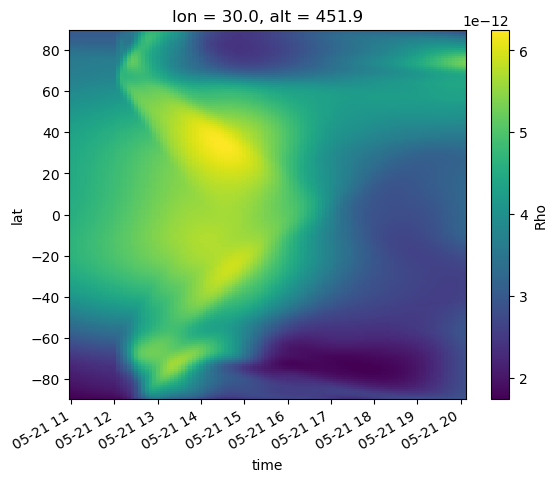

In [11]:
ds.Rho.sel(lon=30, alt=450, method='nearest').plot(x='time',y='lat')

In [12]:
from utility_programs.filters import make_fits

In [13]:
from scipy import signal

In [14]:
lowcut = 1 / (150 / 60)  # 100 minutes in units of sample^-1
highcut = 1 / (30 / 60)  # 30 minutes in units of sample^-1

# Define the Butterworth filter
nyquist = 0.5 * 5  # 5 minutes is the sampling frequency
low = lowcut / nyquist
high = highcut / nyquist
sos = signal.butter(2, [low, high], btype="bandstop", output="sos")

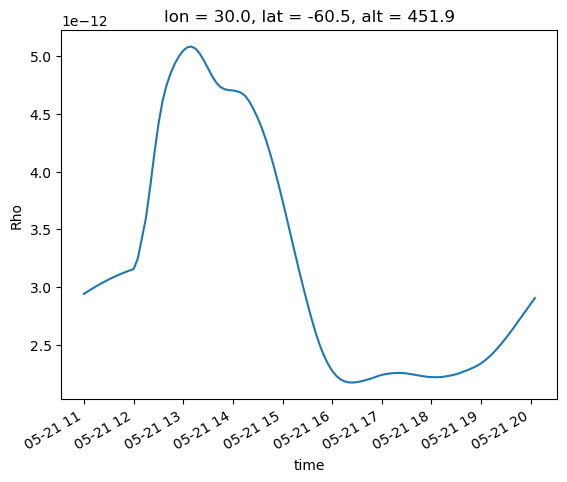

In [15]:
ds.Rho.sel(lon=30,alt=450,lat=-60, method='nearest').plot()

In [16]:
ds2 = xr.apply_ufunc(signal.sosfiltfilt, sos, ds,
                     #input_core_dims=["time"],
                     kwargs={"axis": 0},)

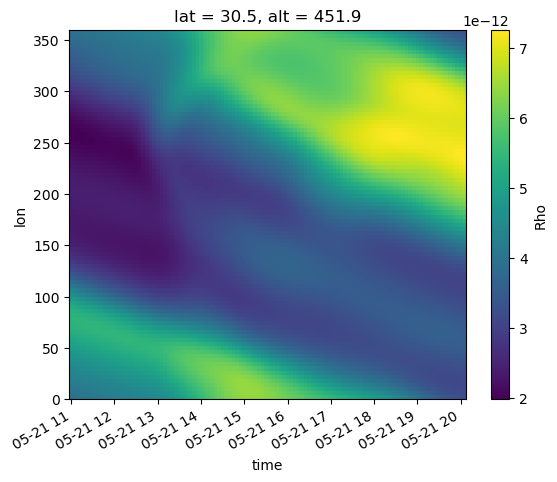

In [17]:
ds2.Rho.sel(lat=30, alt=450, method='nearest').plot(x='time',y='lon')

In [18]:
a = ds.Rho.sel(lon=200, alt=150, method='nearest')
b = ds2.Rho.sel(lon=200, alt=150, method='nearest')

d = 100*(a-b)/a

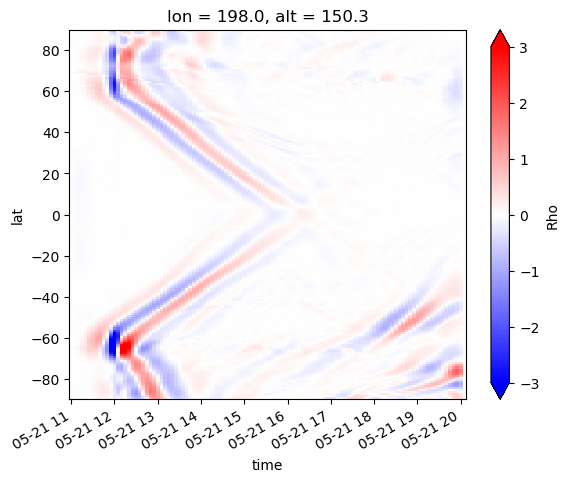

In [19]:
d.plot(x='time',y='lat', vmin=-3, vmax=3, cmap='bwr')

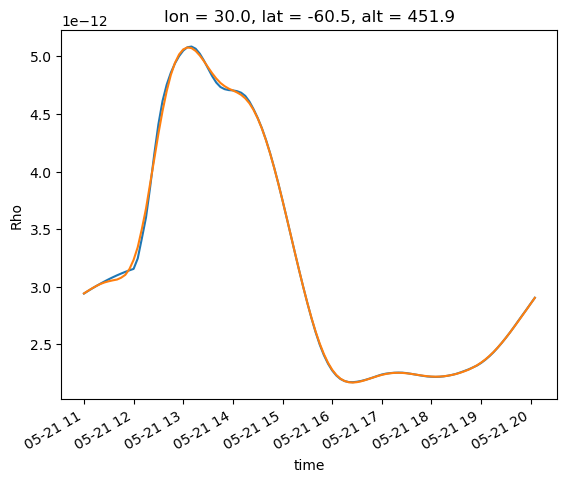

In [20]:
ds.Rho.sel(lon=30,alt=450,lat=-60, method='nearest').plot()
ds2.Rho.sel(lon=30,alt=450,lat=-60, method='nearest').plot()

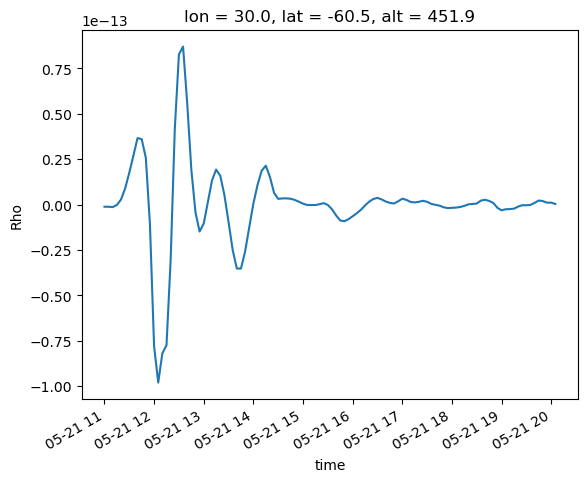

In [21]:
(ds.Rho.sel(lon=30,alt=450,lat=-60, method='nearest') - ds2.Rho.sel(lon=30,alt=450,lat=-60, method='nearest')).plot()

In [22]:
ds

<xarray.Dataset>
Dimensions:      (time: 110, lon: 90, lat: 180, alt: 50)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
  * lon          (lon) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * alt          (alt) float64 100.0 101.7 103.5 105.4 ... 706.7 729.0 751.5
Data variables:
    Rho          (time, lon, lat, alt) float64 5.695e-07 4.142e-07 ... 1.39e-13
    Temperature  (time, lon, lat, alt) float64 179.9 179.5 ... 2.006e+03
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [24]:
ds.time.shape

(110,)

In [25]:
ds2 = ds.sel(lat=20, alt=450, method='nearest')

In [27]:
ds2

<xarray.Dataset>
Dimensions:      (time: 110, lon: 90)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
  * lon          (lon) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
    lat          float64 19.5
    alt          float64 451.9
Data variables:
    Rho          (time, lon) float64 3.978e-12 4.042e-12 ... 3.183e-12 3.135e-12
    Temperature  (time, lon) float64 1.429e+03 1.437e+03 ... 1.357e+03 1.329e+03
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [28]:
ds2.lon.shape

(90,)

In [29]:
d

<xarray.DataArray 'Rho' (time: 110, lat: 180)>
array([[-3.16752610e-03, -3.25405170e-03, -3.38219716e-03, ...,
        -3.16356425e-03, -9.04468092e-04, -6.98643247e-04],
       [-2.70922716e-02, -3.12330651e-02, -3.95169861e-02, ...,
        -9.42661979e-05,  1.80925943e-02,  1.35405320e-02],
       [-4.14855562e-02, -4.59482317e-02, -5.62235743e-02, ...,
         5.44237432e-03,  3.32359934e-02,  2.95807184e-02],
       ...,
       [ 4.78182218e-01,  5.99798487e-01,  5.22077708e-01, ...,
        -8.74850574e-04, -2.09188043e-02, -4.14448250e-02],
       [ 3.85184213e-01,  4.15311950e-01,  2.97830900e-01, ...,
        -1.91208861e-03, -1.50286926e-02, -4.11820148e-02],
       [-1.04458927e-02, -2.68507888e-02, -4.91969244e-02, ...,
        -1.72504935e-02, -1.64712840e-02, -1.43160878e-02]])
Coordinates:
  * time     (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05-21T...
    lon      float64 198.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    alt      float64 150.3

In [31]:
c = {'lat':30, 'lon':200, 'alt':150}

In [32]:
list(c)

['lat', 'lon', 'alt']

In [35]:
ds.sel(c, method = 'nearest')

<xarray.Dataset>
Dimensions:      (time: 110)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
    lon          float64 198.0
    lat          float64 30.5
    alt          float64 150.3
Data variables:
    Rho          (time) float64 2.195e-09 2.19e-09 ... 3.255e-09 3.272e-09
    Temperature  (time) float64 647.0 649.0 651.0 652.9 ... 756.6 758.4 760.0
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [37]:
c = {}

In [38]:
ds.sel(c, method = 'nearest')

<xarray.Dataset>
Dimensions:      (time: 110, lon: 90, lat: 180, alt: 50)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
  * lon          (lon) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * alt          (alt) float64 100.0 101.7 103.5 105.4 ... 706.7 729.0 751.5
Data variables:
    Rho          (time, lon, lat, alt) float64 5.695e-07 4.142e-07 ... 1.39e-13
    Temperature  (time, lon, lat, alt) float64 179.9 179.5 ... 2.006e+03
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [39]:
ds

<xarray.Dataset>
Dimensions:      (time: 110, lon: 90, lat: 180, alt: 50)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
  * lon          (lon) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * alt          (alt) float64 100.0 101.7 103.5 105.4 ... 706.7 729.0 751.5
Data variables:
    Rho          (time, lon, lat, alt) float64 5.695e-07 4.142e-07 ... 1.39e-13
    Temperature  (time, lon, lat, alt) float64 179.9 179.5 ... 2.006e+03
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [41]:
ds.transpose()

<xarray.Dataset>
Dimensions:      (time: 110, lon: 90, lat: 180, alt: 50)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
  * lon          (lon) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * alt          (alt) float64 100.0 101.7 103.5 105.4 ... 706.7 729.0 751.5
Data variables:
    Rho          (alt, lat, lon, time) float64 5.695e-07 5.695e-07 ... 1.39e-13
    Temperature  (alt, lat, lon, time) float64 179.9 179.9 ... 2.006e+03
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True

In [42]:
ds

<xarray.Dataset>
Dimensions:      (time: 110, lon: 90, lat: 180, alt: 50)
Coordinates:
  * time         (time) datetime64[ns] 2011-05-21T11:00:00.280000 ... 2011-05...
  * lon          (lon) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * alt          (alt) float64 100.0 101.7 103.5 105.4 ... 706.7 729.0 751.5
Data variables:
    Rho          (time, lon, lat, alt) float64 5.695e-07 4.142e-07 ... 1.39e-13
    Temperature  (time, lon, lat, alt) float64 179.9 179.5 ... 2.006e+03
Attributes:
    version:              21.14
    dropped-ghost-cells:  False
    with_time:            True